<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/ML_Lab%E2%84%965/Autoincoder_by_A1exprog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pickle

from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader


import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
df = pd.read_csv('transaction_dataset.csv')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
print(df.shape)
print(df.describe())

(9841, 51)
        Unnamed: 0        Index         FLAG  Avg min between sent tnx  \
count  9841.000000  9841.000000  9841.000000               9841.000000   
mean   4920.000000  1815.049893     0.221421               5086.878721   
std    2840.996333  1222.621830     0.415224              21486.549974   
min       0.000000     1.000000     0.000000                  0.000000   
25%    2460.000000   821.000000     0.000000                  0.000000   
50%    4920.000000  1641.000000     0.000000                 17.340000   
75%    7380.000000  2601.000000     0.000000                565.470000   
max    9840.000000  4729.000000     1.000000             430287.670000   

       Avg min between received tnx  Time Diff between first and last (Mins)  \
count                   9841.000000                             9.841000e+03   
mean                    8004.851184                             2.183333e+05   
std                    23081.714801                             3.229379e+05   
mi

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Index,0
Address,0
FLAG,0
Avg min between sent tnx,0
Avg min between received tnx,0
Time Diff between first and last (Mins),0
Sent tnx,0
Received Tnx,0
Number of Created Contracts,0


In [ ]:
df = df.dropna()

In [ ]:
df['FLAG'].value_counts()

,count
FLAG,
0,5771
1,1350


<ipython-input-7-941b54d867c9>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['FLAG'], sort = True)


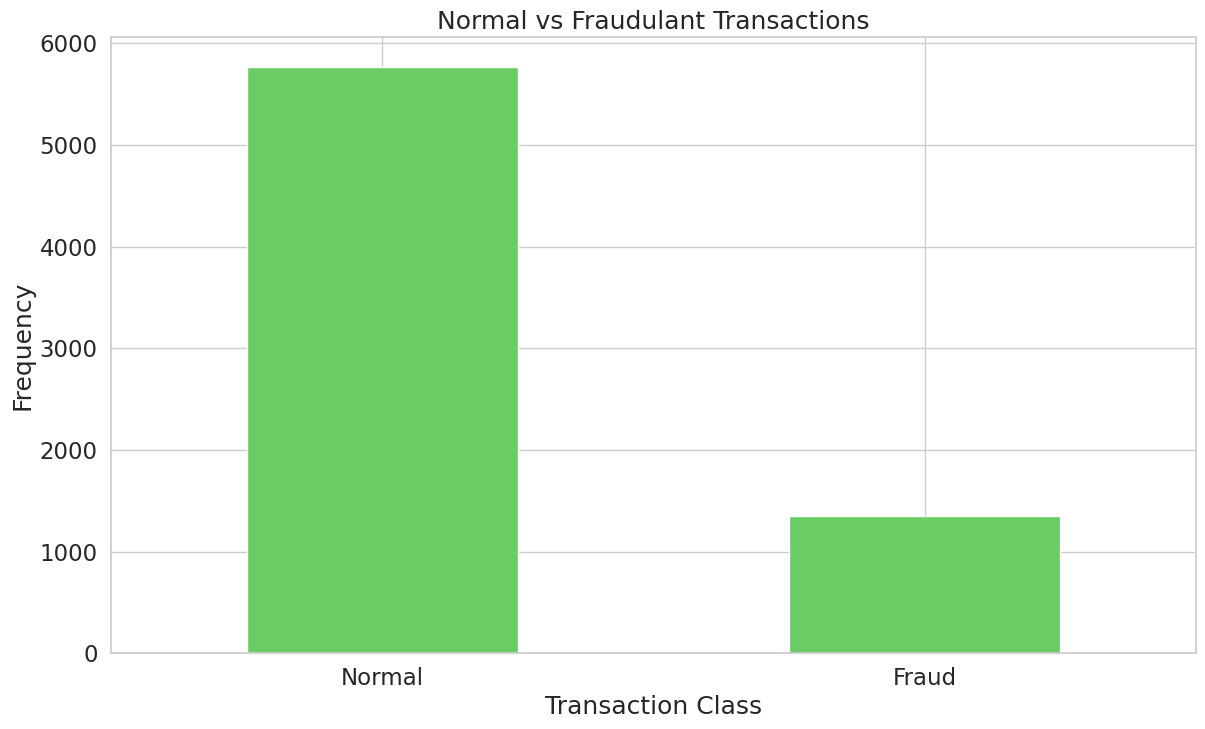

In [ ]:
count_classes = pd.value_counts(df['FLAG'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color="g")
plt.title("Normal vs Fraudulant Transactions")
plt.xticks(range(2), LABELS)
plt.xlabel("Transaction Class")
plt.ylabel("Frequency");

In [ ]:
y=df.pop('FLAG')
df=df.drop('Address',axis=1)
encoder = LabelEncoder()

df[' ERC20 most sent token type'] = encoder.fit_transform(df[' ERC20 most sent token type']) # категориальные в число
df[' ERC20_most_rec_token_type'] = encoder.fit_transform(df[' ERC20_most_rec_token_type'])

scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_sc, columns=df.columns)

y = y.reset_index(drop=True)
df_scaled = pd.concat([df_scaled, y], axis=1)

Мы разделили набор данных как обучение = 80% и тест = 20%. В обучающем наборе данных будут только обычные транзакции, а в тестовом наборе данных будут как обычные, так и мошеннические транзакции.

In [ ]:
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.FLAG == 0]
X_train = X_train.drop(['FLAG'], axis=1)

y_test = X_test['FLAG']
X_test = X_test.drop(['FLAG'], axis=1)

X_train = X_train.values

X_test = X_test.values
y_test = y_test.values
print(y_test.size)


1425


In [ ]:
df_scaled.shape

(7121, 50)

In [ ]:
X_train.shape

(4599, 49)

Мы построим автоэнкодер, состоящий из 4 полносвязных слоев с 32,16,32,49 нейронами. Первые 2 слоя действуют как кодировщик, а последние 2 слоя действуют как декодер.

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(49, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.LeakyReLU(),
            )

        self.decoder = nn.Sequential(
           nn.Linear(16, 32),
           nn.Tanh(),
           nn.Linear(32, 49),
           nn.LeakyReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = Autoencoder().double()

In [ ]:
num_epochs = 100
minibatch_size = 32
learning_rate = 1e-3

In [ ]:
train_loader = data_utils.DataLoader(X_train, batch_size=minibatch_size, shuffle=True)
test_loader = data_utils.DataLoader(X_test, batch_size=1, shuffle=False)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(
model.parameters(), lr=learning_rate, weight_decay=10e-05)

In [ ]:
history = {}
history['train_loss'] = []
history['test_loss'] = []

In [ ]:
for epoch in range(num_epochs):
    h = np.array([])
    for data in train_loader:
        #print(type(data))
        #data = Variable(data).cpu()
        #print(type(data))
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        h = np.append(h, loss.item())

        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    mean_loss = np.mean(h)
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, mean_loss))
    history['train_loss'].append(mean_loss)


torch.save(model.state_dict(), './credit_card_model.pth')

epoch [1/100], loss:0.6663
epoch [2/100], loss:0.5625
epoch [3/100], loss:0.4951
epoch [4/100], loss:0.4628
epoch [5/100], loss:0.4396
epoch [6/100], loss:0.4232
epoch [7/100], loss:0.4097
epoch [8/100], loss:0.3986
epoch [9/100], loss:0.3879
epoch [10/100], loss:0.3780
epoch [11/100], loss:0.3694
epoch [12/100], loss:0.3615
epoch [13/100], loss:0.3536
epoch [14/100], loss:0.3708
epoch [15/100], loss:0.3386
epoch [16/100], loss:0.3331
epoch [17/100], loss:0.3249
epoch [18/100], loss:0.3183
epoch [19/100], loss:0.3128
epoch [20/100], loss:0.3064
epoch [21/100], loss:0.3012
epoch [22/100], loss:0.2957
epoch [23/100], loss:0.2923
epoch [24/100], loss:0.2861
epoch [25/100], loss:0.2811
epoch [26/100], loss:0.2768
epoch [27/100], loss:0.2730
epoch [28/100], loss:0.2687
epoch [29/100], loss:0.2647
epoch [30/100], loss:0.2615
epoch [31/100], loss:0.2577
epoch [32/100], loss:0.2547
epoch [33/100], loss:0.2503
epoch [34/100], loss:0.2470
epoch [35/100], loss:0.2444
epoch [36/100], loss:0.2409
e

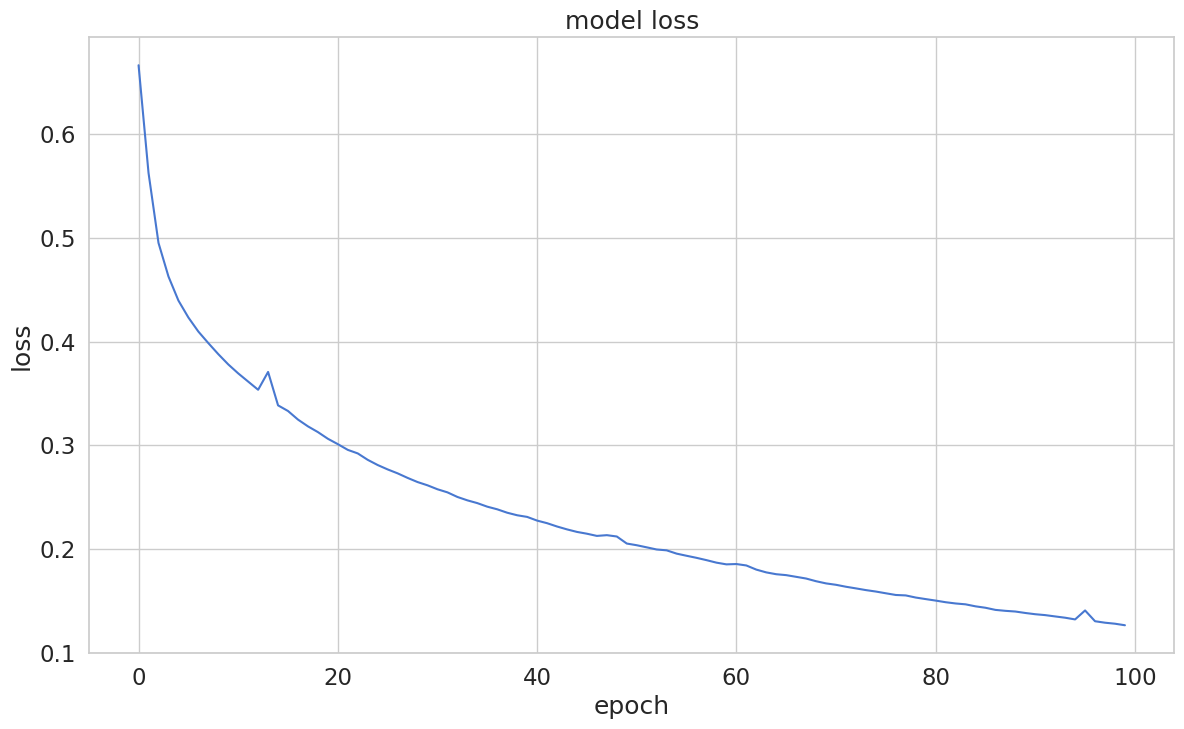

In [ ]:

plt.plot(history['train_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Оценка модели

In [ ]:
pred_losses = {'pred_loss' : []}
model.eval()
with torch.no_grad():
   # test_loss = 0
    for data in test_loader:
        inputs = data
        # print(inputs)
        outputs = model(inputs)
        loss = criterion(outputs, inputs).data.item()
        #print(loss)
        pred_losses['pred_loss'].append(loss)
        #pred_losses = model([y_test.size, y_test])
reconstructionErrorDF = pd.DataFrame(pred_losses)
reconstructionErrorDF['FLAG'] = y_test

In [ ]:
reconstructionErrorDF.describe()

,pred_loss,FLAG
count,1425.000000,1425.000000
mean,1.114374,0.177544
std,21.720102,0.382262
min,0.003533,0.000000
25%,0.017743,0.000000
50%,0.036662,0.000000
75%,0.069239,0.000000
max,637.352768,1.000000


# Reconstruction Errors without Fraud (ошибки восстановления)

In [ ]:
print(normal_error_df['pred_loss'].describe())


count    1172.000000
mean        0.789456
std        15.088345
min         0.003533
25%         0.017104
50%         0.029024
75%         0.050218
max       423.414570
Name: pred_loss, dtype: float64


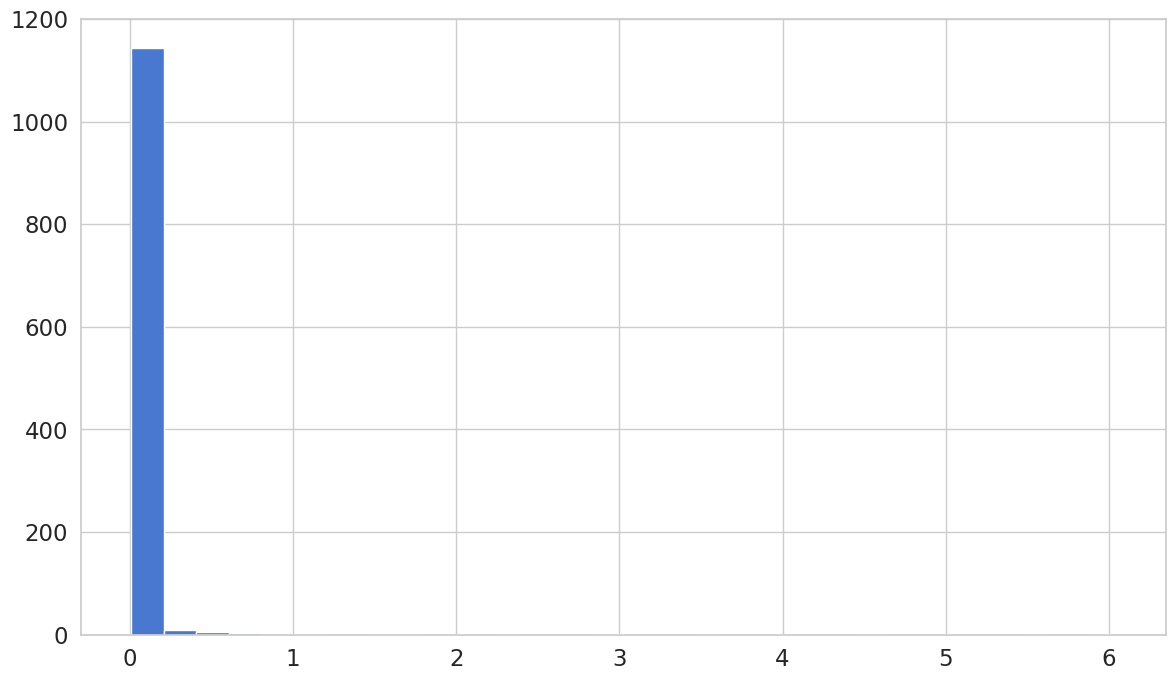

In [ ]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df.loc[:, 'log_pred_loss'] = np.log(normal_error_df['pred_loss'] + 1)

_ = ax.hist(normal_error_df['log_pred_loss'], bins=30)


# Reconstruction Errors with Fraud

<ipython-input-42-6d0d5c8cdd25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_error_df['log_pred_loss'] = np.log(fraud_error_df['pred_loss'] + 1)


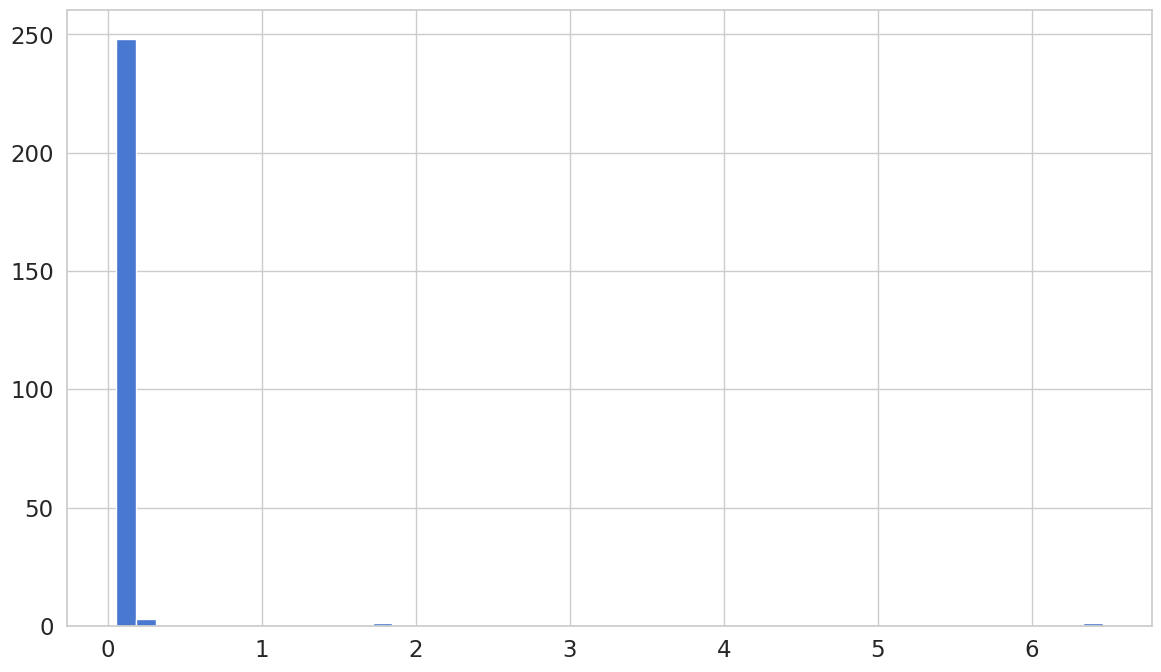

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = reconstructionErrorDF[(reconstructionErrorDF['FLAG'] == 1)]

# Логарифмирование с добавлением 1 (чтобы избежать логарифма от нуля)
fraud_error_df['log_pred_loss'] = np.log(fraud_error_df['pred_loss'] + 1)

# Построение гистограммы для логарифмированных значений
_ = ax.hist(fraud_error_df['log_pred_loss'].values, bins=50)


# ROC Curves

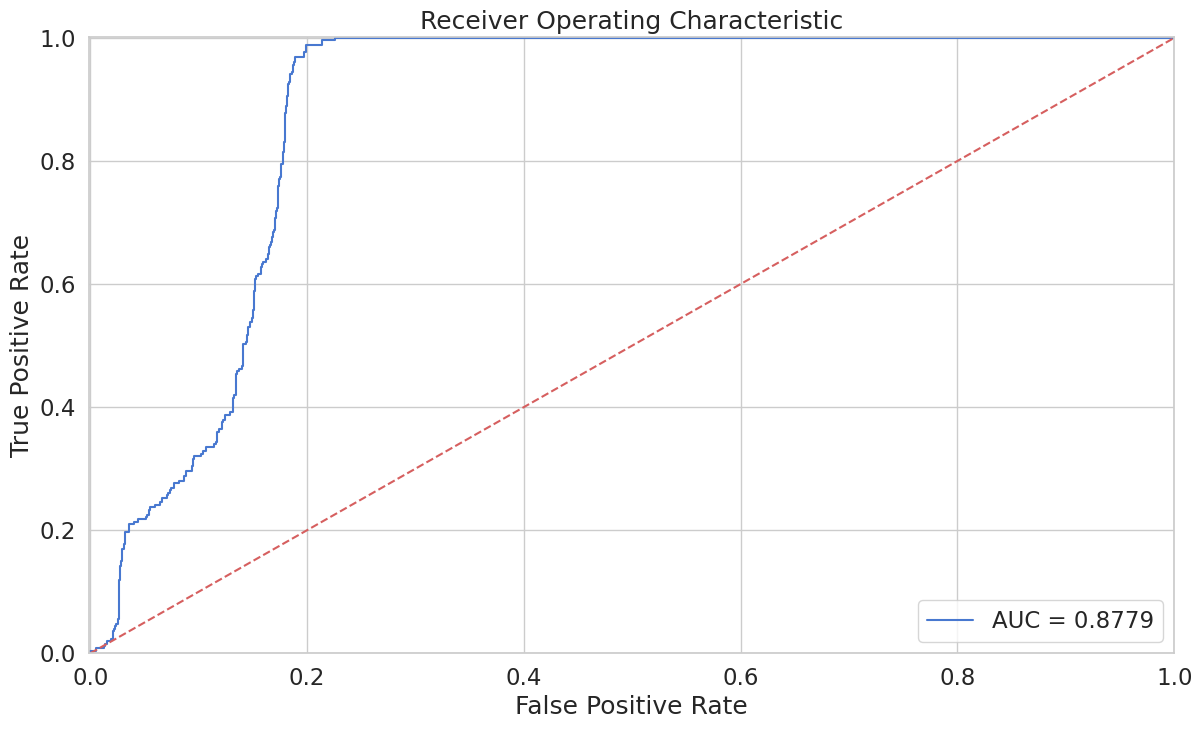

In [ ]:
fpr, tpr, thresholds = roc_curve(reconstructionErrorDF.FLAG, reconstructionErrorDF.pred_loss)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

ROC-кривая очень часто используется для анализа бинарных классификаторов. Он рассматривает все возможные пороговые значения для данного классификатора и показывает процент ложных срабатываний (FPR) по сравнению с показателями истинно положительных результатов (TPR)

# Precision vs Recall

Установка порога, который используется для принятия решения о классификации в модели, — это способ настроить компромисс между точностью (precision) и полнотой (recall) для данного классификатора.

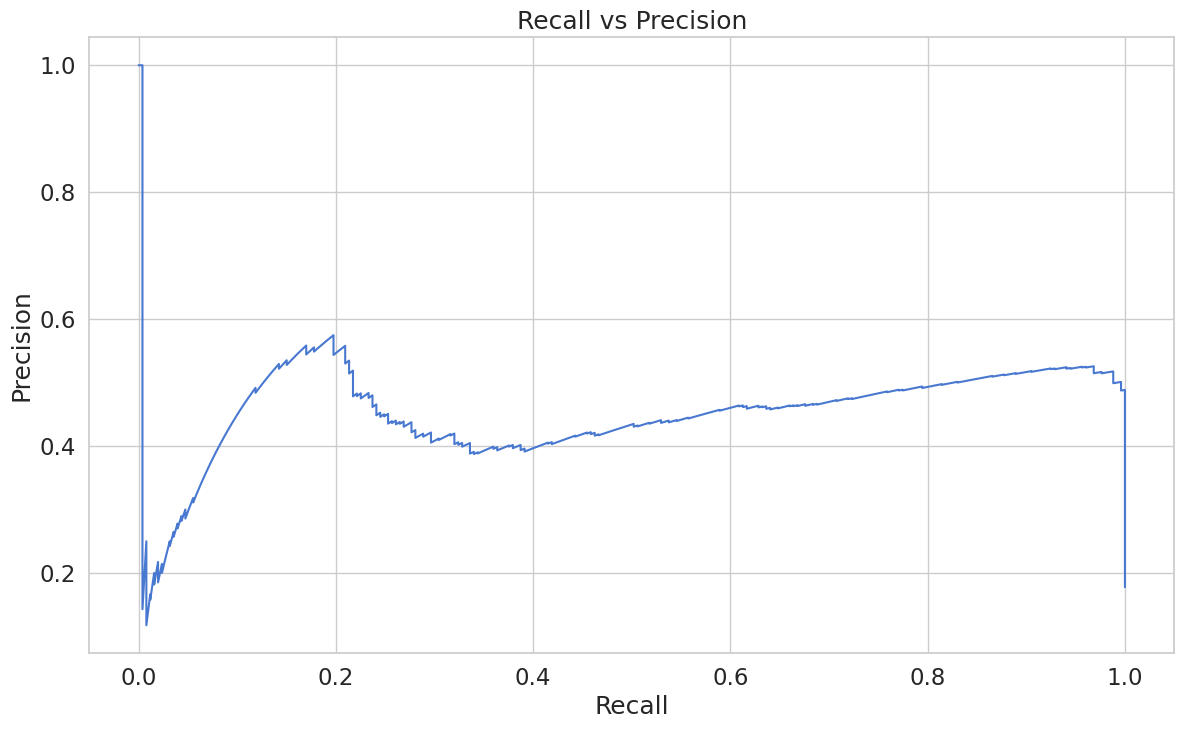

In [ ]:
precision, recall, th = precision_recall_curve(reconstructionErrorDF.FLAG, reconstructionErrorDF.pred_loss)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

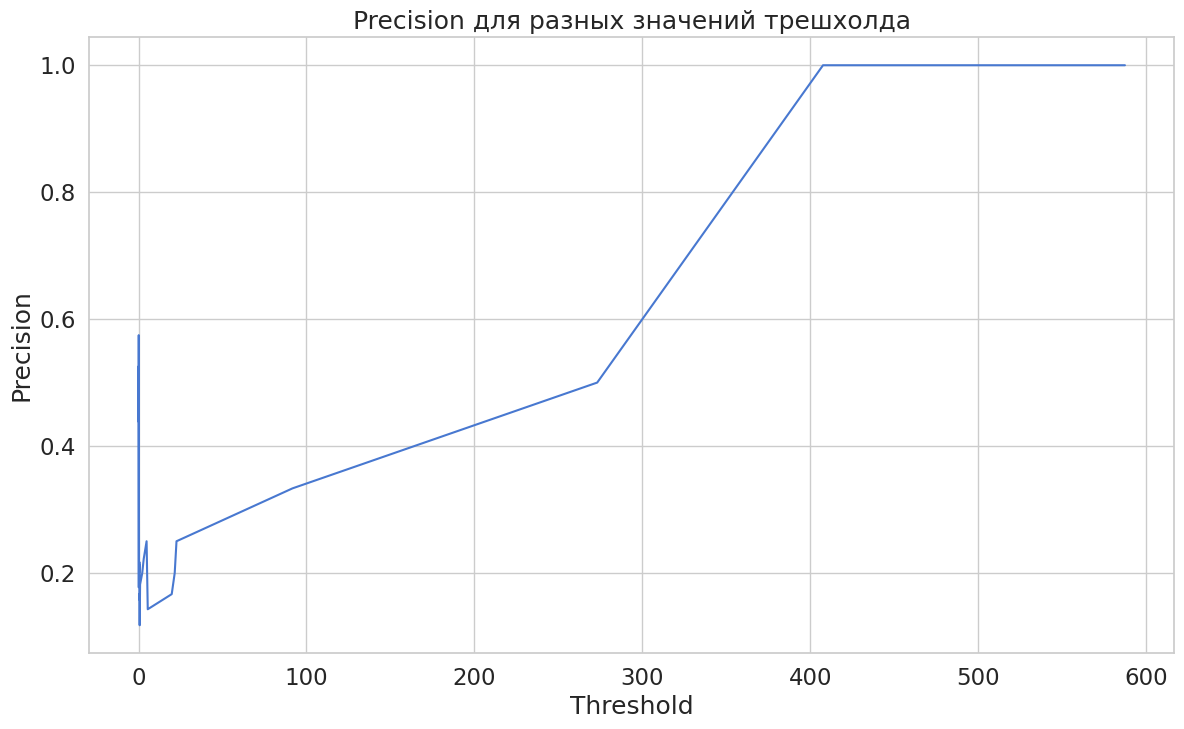

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision для разных значений трешхолда')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

Вы можете видеть, что по мере увеличения ошибки реконструкции повышается и наша precision. Давайте посмотрим на recall:

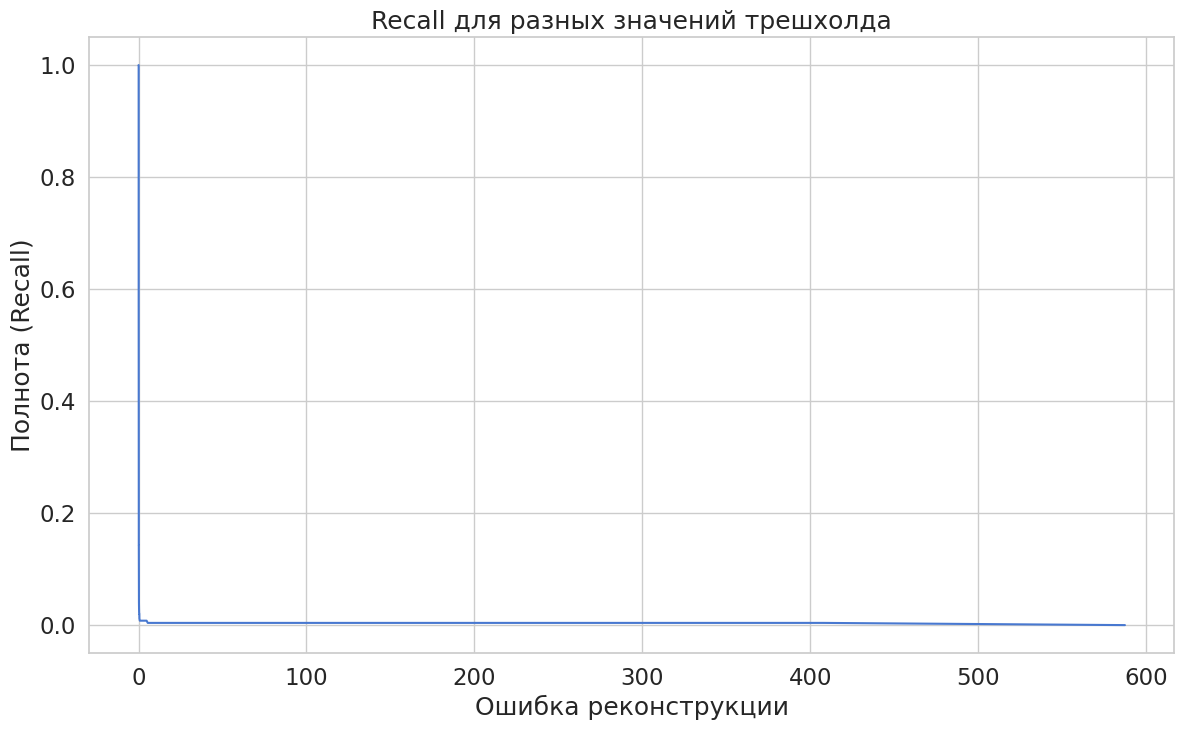

In [ ]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall для разных значений трешхолда')
plt.xlabel('Ошибка реконструкции')
plt.ylabel('Полнота (Recall)')
plt.show()

Здесь мы имеем прямо противоположную ситуацию. По мере увеличения ошибки реконструкции recall (полнота) уменьшается.

# Используем модель для того, чтобы сделать предсказание

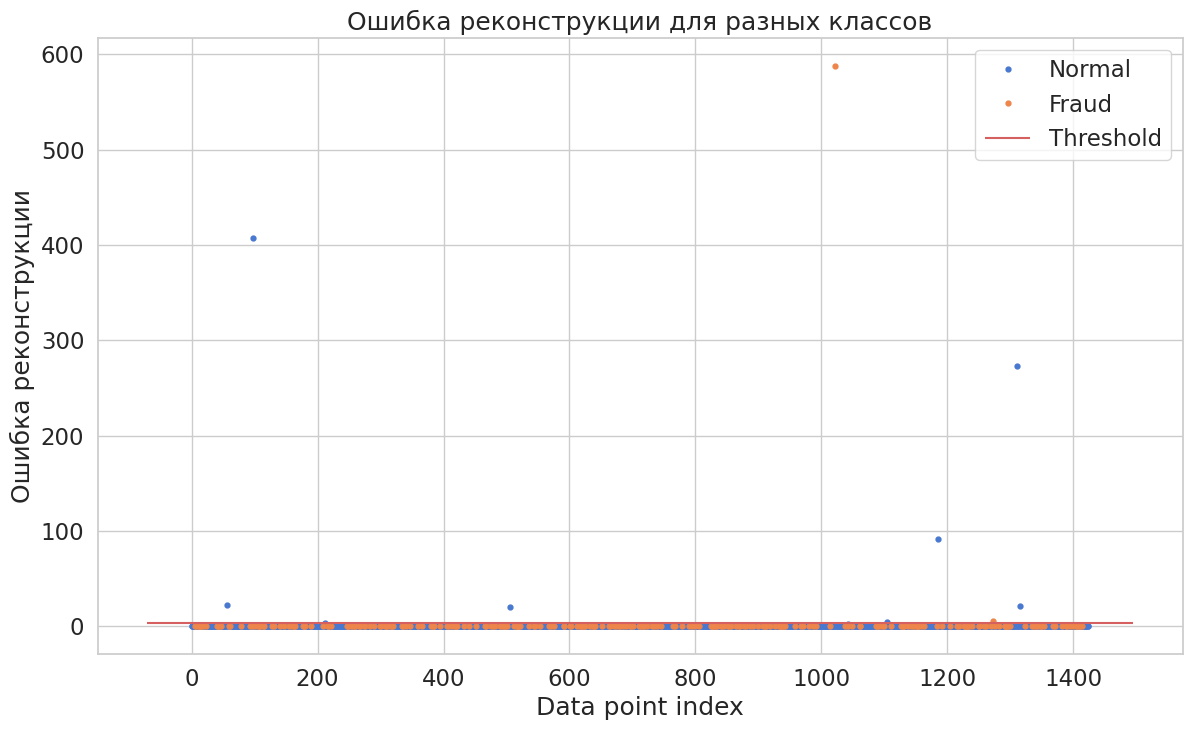

In [ ]:
threshold = 2.9
groups = reconstructionErrorDF.groupby('FLAG')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.pred_loss, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Ошибка реконструкции для разных классов")
plt.ylabel("Ошибка реконструкции")
plt.xlabel("Data point index")
plt.show();

Построим и посмотрим confusion matrix:

<ipython-input-41-4923c12a839e>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Blues'));


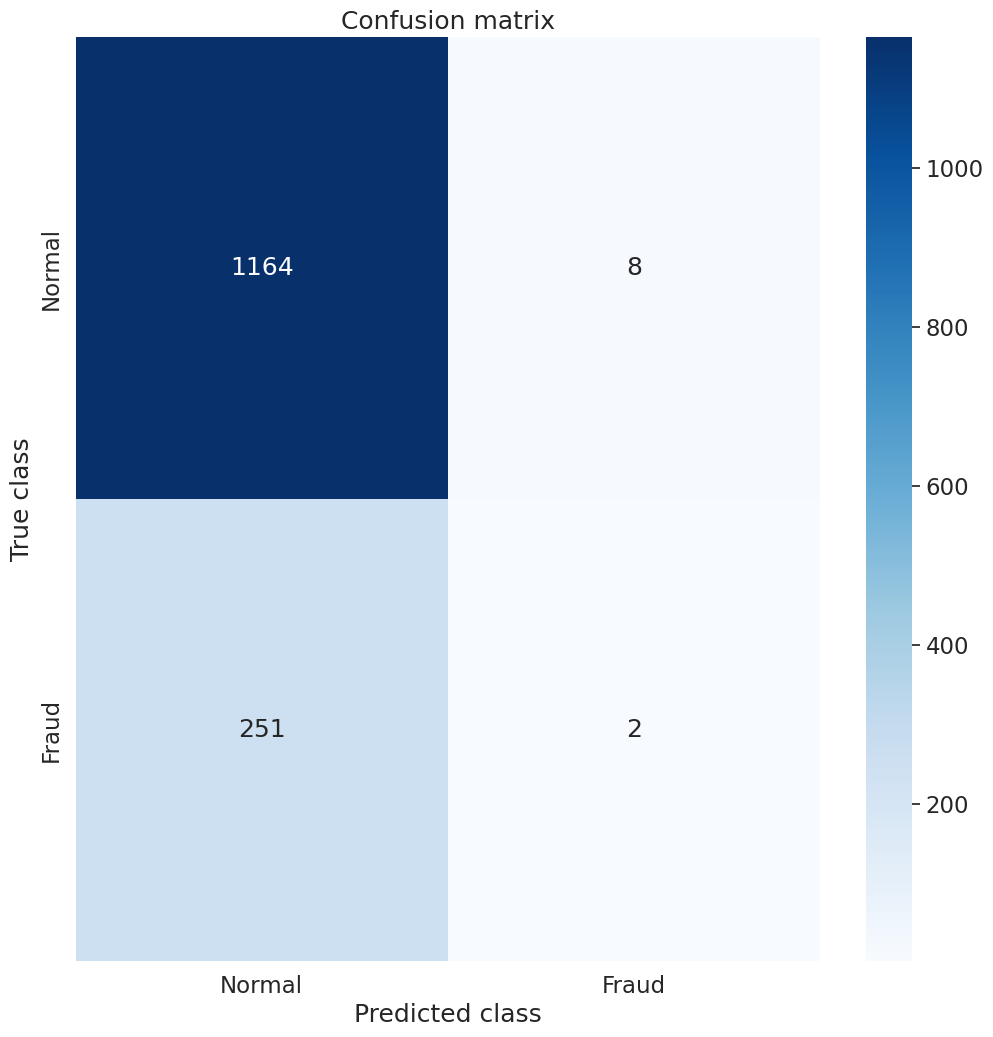

In [ ]:

y_pred = [1 if e > threshold else 0 for e in reconstructionErrorDF.pred_loss.values]
conf_matrix = confusion_matrix(reconstructionErrorDF.FLAG, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",
            cmap=plt.cm.get_cmap('Blues'));
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Наша модель, похоже, выявляет множество случаев мошенничества. Но количество обычных транзакций, классифицируемых как мошенничество, действительно велико. Можно настроить порог здесь и там, чтобы получить лучшие результаты.